# The Battle of Neighborhoods

### London District WC1R

The aim of this project is to explore possibilities to open a business in London. 
In the first part, I look at the different venue categories and their location. I have showed what venues are least commons, as well as what is the population average income. The average income information could further serve as an indicator of the areas' living standards.

<br/> The project deals with data about London districts via a combination of two datasets: 
<br/> 1) doogal.co.uk - dataset with London postcodes with district and average income details. 
<br/> 2) Foresquare - explore venues around the WC1R London district - analysis limited to Central West London 


#### Import Libraries

In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np

### Download and prepare data about London West End, District WC1R

#### Scrape the List of postal codes and coordinates of WC1R from Doogal and create a DataFrame

In [4]:
# Read csv file with data
df_all_Lnd=pd.read_csv('https://www.doogal.co.uk/UKPostcodesCSV.ashx?region=E12000007')
print(df_all_Lnd.shape)
df_all_Lnd.head()

(321834, 47)


,Postcode,In Use?,Latitude,Longitude,Easting,Northing,Grid Ref,County,District,Ward,...,User Type,Last updated,Nearest station,Distance to station,Postcode area,Postcode district,Police force,Water company,Plus Code,Average Income
0,BR1 1AA,Yes,51.401546,0.015415,540291,168873,TQ402688,Greater London,Bromley,Bromley Town,...,0,2020-02-19,Bromley South,0.218257,BR,BR1,Metropolitan Police,Thames Water,9F32C228+J5,63100
1,BR1 1AB,Yes,51.406333,0.015208,540262,169405,TQ402694,Greater London,Bromley,Bromley Town,...,0,2020-02-19,Bromley North,0.253666,BR,BR1,Metropolitan Police,Thames Water,9F32C248+G3,56100
2,BR1 1AD,No,51.400057,0.016715,540386,168710,TQ403687,Greater London,Bromley,Bromley Town,...,1,2020-02-19,Bromley South,0.044559,BR,BR1,Metropolitan Police,NaN,9F32C228+2M,63100
3,BR1 1AE,Yes,51.404543,0.014195,540197,169204,TQ401692,Greater London,Bromley,Bromley Town,...,0,2020-02-19,Bromley North,0.462939,BR,BR1,Metropolitan Police,Thames Water,9F32C237+RM,63100
4,BR1 1AF,Yes,51.401392,0.014948,540259,168855,TQ402688,Greater London,Bromley,Bromley Town,...,0,2020-02-19,Bromley South,0.227664,BR,BR1,Metropolitan Police,Thames Water,9F32C227+HX,63100


#### We will use the above dataset to prepare later a dataframe with Average Income to link to the venues in the WC1R area.

In [5]:
income_coords=df_all_Lnd[['Postcode','Latitude','Longitude','Average Income']]
print(income_coords.shape)
income_coords.head()

(321834, 4)


,Postcode,Latitude,Longitude,Average Income
0,BR1 1AA,51.401546,0.015415,63100
1,BR1 1AB,51.406333,0.015208,56100
2,BR1 1AD,51.400057,0.016715,63100
3,BR1 1AE,51.404543,0.014195,63100
4,BR1 1AF,51.401392,0.014948,63100


### Venues in London District WC1R

#### Explore and cluster the Venues in WC1R District of London

Prepare map facilities

In [6]:
!pip install geopy
from geopy.geocoders import Nominatim 

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode('WC1R')
latitude_L = location.latitude
longitude_L = location.longitude
print('The geograpical coordinate of London District WC1R are {}, {}.'.format(latitude_L, longitude_L))

The geograpical coordinate of London District WC1R are 51.5191352, -0.1154919.


In [7]:
!pip install folium
import folium # map rendering library

     |████████████████████████████████| 92kB 11.6MB/s eta 0:00:01


In [8]:
# The code was removed by Watson Studio for sharing.

In [9]:
LIMIT = 100 
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude_L, 
    longitude_L, 
    radius, 
    LIMIT)
url

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e8f20b0211536001b154643'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Holborn and Covent Garden',
  'headerFullLocation': 'Holborn and Covent Garden, London',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 86,
  'suggestedBounds': {'ne': {'lat': 51.5236352045,
    'lng': -0.10827361290735608},
   'sw': {'lat': 51.5146351955, 'lng': -0.1227101870926439}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bbdcf1d07809521ddf4da91',
       'name': "Gray's Inn Gardens",
       'location': {'address': '19-20 High Holborn',
        'lat': 51.520335040836784,
        'lng': -0.1138905874180336,
        'labeledLatLngs': [{'label':

In [10]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [11]:
# Function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# Clean the json and structure it into a pandas dataframe    
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

print(nearby_venues.shape)
nearby_venues

(86, 4)


,name,categories,lat,lng
0,Gray's Inn Gardens,Garden,51.520335,-0.113891
1,Scarfes Bar,Hotel Bar,51.517813,-0.118184
2,Rosewood London,Hotel,51.517468,-0.117810
3,Catalyst Cafe,Coffee Shop,51.519705,-0.112052
4,Cittie of Yorke,Pub,51.518620,-0.112599
5,Holborn Dining Room,English Restaurant,51.517493,-0.117541
6,Mirror Room,Restaurant,51.517444,-0.117824
7,eat TOKYO,Japanese Restaurant,51.519849,-0.117410
8,Warner Bros Screening Rooms,Office,51.520104,-0.118956
9,Sir John Soane's Museum,History Museum,51.516833,-0.117540


In [12]:
# Create a dataframe with Average Income for each of the latitudes in nearby_venues['lat']

list=[48000,44500,65300,47700,47400,47400,47400,44000,73500,46000,65400,65400,45000,45000,47300,54000,47700,39800,44000,59000,59000,50000,53100,47300,47300,47300,50200,65400,46800,43800,59000,53800,54000,51200,47100,60700,73500,73500,43800,47300,44500,51700,46800,40200,40200,65100,53000,56500,56500,54000,47400,65400,65400,73500,44500,51200,43600,65400,46800,51800,54000,45900,53100,45700,45700,45700,45700,45700,50000,54000,50000,65400,42500,53000,53100,43600,50000,59000,48900,71200,71200,45700,45700,40200,41200,59000,59000,60700]
average_income=pd.DataFrame(list)
average_income.rename(columns={0:'Average Income'}, inplace=True)
average_income.head()

,Average Income
0,48000
1,44500
2,65300
3,47700
4,47400


In [13]:
# Create a dataframe with PostalCodese for each of the latitudes in nearby_venues['lat']
codes=["E34HU","E13HZ","E11JQ","UB69BS","UB69AU","E65XJ","WC1V 7EN","W71AB","W1G6NZ","UB78PD","EC2M7SH","WC1X 8PN","E146BJ","WC1N 3NB","W106LR","W1G9JU","UB12SP","NW88HF","W71PH","W138BG","WC2H 9RY","EC1N8TE","UB40DZ","W106AG","WC1R 4R","WC1N 3NB","WC1R4BG","EC2Y5AQ","W1T4NA","UB83JF","W138AW","EC1M5US","W1W7QZ","E34HE","W105LT","NW16JF","W1G8HQ","W1H6LP","UB32NX","W106LX","E14NA","UB78AN","W1T6NU","E164HH","WC1B 4AA","W21SS","UB49TZ","W111DB","WC1A 2QH","W1P3FG","E163ST","EC1A7BB","EC1R 5AR","W1G6JP","E14LJ","E33PB","E63SX","WC2A 3JW","W1P5GA","E161GW","W1W8AN","W120NN","E17TE","E14QY","WC1N 3AQ","EC1N 7S","WC1N 3LZ","WC1N 3AL","WC1N3QY","W1N7DF","EC1N8PE","EC2V5AE","IG110JU","UB49YD","E15LG","E63RY","EC1N7UY","W130JF","EC1Y8SE","W1H1PZ","W1U5AG","E14SE","WC1N 3LT","E138EQ","E163PS","W138BG","WC1N 3LW","NW16JQ"]
post_codes=pd.DataFrame(codes)
post_codes.rename(columns={0:'Postcode'}, inplace=True)
post_codes.head()

,Postcode
0,E34HU
1,E13HZ
2,E11JQ
3,UB69BS
4,UB69AU


In [14]:
# Add Average income data to nearby_venues
                               
nearby_venues['Average Income']=average_income['Average Income']
nearby_venues['Postcode']=post_codes['Postcode']
nearby_venues.head()

,name,categories,lat,lng,Average Income,Postcode
0,Gray's Inn Gardens,Garden,51.520335,-0.113891,48000,E34HU
1,Scarfes Bar,Hotel Bar,51.517813,-0.118184,44500,E13HZ
2,Rosewood London,Hotel,51.517468,-0.117810,65300,E11JQ
3,Catalyst Cafe,Coffee Shop,51.519705,-0.112052,47700,UB69BS
4,Cittie of Yorke,Pub,51.518620,-0.112599,47400,UB69AU


In [16]:
# Make a copy of nearby_venues which will beused for clustering
london_venues=nearby_venues.copy()
print(london_venues.shape)
london_venues.head()

(86, 6)


,name,categories,lat,lng,Average Income,Postcode
0,Gray's Inn Gardens,Garden,51.520335,-0.113891,48000,E34HU
1,Scarfes Bar,Hotel Bar,51.517813,-0.118184,44500,E13HZ
2,Rosewood London,Hotel,51.517468,-0.117810,65300,E11JQ
3,Catalyst Cafe,Coffee Shop,51.519705,-0.112052,47700,UB69BS
4,Cittie of Yorke,Pub,51.518620,-0.112599,47400,UB69AU


#### Create a map of London Venues

In [17]:
# Create map of London using lat and lng values
map_WestLondon = folium.Map(location=[latitude_L, longitude_L], zoom_start=17)

# Add markers to map
for lat, lng, label in zip(london_venues['lat'], london_venues['lng'], london_venues['name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_WestLondon)  
    
map_WestLondon

### Postal Codes Clusters Analysis

In [18]:
# Display numbers of venues for each postcode
london_venues.groupby('Postcode').count()

,name,categories,lat,lng,Average Income
Postcode,,,,,
E11JQ,1,1,1,1,1
E138EQ,1,1,1,1,1
E13HZ,1,1,1,1,1
E146BJ,1,1,1,1,1
E14LJ,1,1,1,1,1
E14NA,1,1,1,1,1
E14QY,1,1,1,1,1
E14SE,1,1,1,1,1
E15LG,1,1,1,1,1


In [19]:
print(london_venues.shape)
london_venues.head()

(86, 6)


,name,categories,lat,lng,Average Income,Postcode
0,Gray's Inn Gardens,Garden,51.520335,-0.113891,48000,E34HU
1,Scarfes Bar,Hotel Bar,51.517813,-0.118184,44500,E13HZ
2,Rosewood London,Hotel,51.517468,-0.117810,65300,E11JQ
3,Catalyst Cafe,Coffee Shop,51.519705,-0.112052,47700,UB69BS
4,Cittie of Yorke,Pub,51.518620,-0.112599,47400,UB69AU


#### One Hot Encoding 

In [21]:
# One Hot encoding of london_venues
london_onehot = pd.get_dummies(london_venues[['categories']], prefix="", prefix_sep="")

# Add Postcode column back to dataframe
london_onehot['Postcode'] = london_venues['Postcode'] 

# Move Postcode column to the first column
col_name="Postcode"
first_col = london_onehot.pop(col_name)
london_onehot.insert(0, col_name, first_col)

london_onehot.head()

,Postcode,Art Gallery,Arts & Crafts Store,Asian Restaurant,Bakery,Beer Bar,Bookstore,Bowling Alley,Burger Joint,Burrito Place,Café,Cheese Shop,Coffee Shop,Convention Center,Coworking Space,Creperie,Donut Shop,English Restaurant,Falafel Restaurant,Flea Market,Food Truck,French Restaurant,Garden,Grocery Store,Gym / Fitness Center,History Museum,Hotel,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Park,Plaza,Portuguese Restaurant,Pub,Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Shoe Store,Sporting Goods Shop,Tapas Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar
0,E34HU,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,E13HZ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,E11JQ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,UB69BS,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,UB69AU,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [23]:
# Group onehot results by Postcode
london_grouped = london_onehot.groupby('Postcode').mean().reset_index()
london_grouped.head()

,Postcode,Art Gallery,Arts & Crafts Store,Asian Restaurant,Bakery,Beer Bar,Bookstore,Bowling Alley,Burger Joint,Burrito Place,Café,Cheese Shop,Coffee Shop,Convention Center,Coworking Space,Creperie,Donut Shop,English Restaurant,Falafel Restaurant,Flea Market,Food Truck,French Restaurant,Garden,Grocery Store,Gym / Fitness Center,History Museum,Hotel,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Park,Plaza,Portuguese Restaurant,Pub,Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Shoe Store,Sporting Goods Shop,Tapas Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar
0,E11JQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,E138EQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,E13HZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,E146BJ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,E14LJ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# Calculate frequency of venues based on their number per Postcode and display the 5 least common categories
num_bottom_venues = 5

for hood in london_grouped['Postcode']:
    print("----"+hood+"----")
    temp = london_grouped[london_grouped['Postcode'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=True).reset_index(drop=True).head(num_bottom_venues))
    print('\n')

----E11JQ----
                 venue  freq
0          Art Gallery   0.0
1            Hotel Bar   0.0
2   Italian Restaurant   0.0
3  Japanese Restaurant   0.0
4    Korean Restaurant   0.0


----E138EQ----
                 venue  freq
0          Art Gallery   0.0
1                Hotel   0.0
2            Hotel Bar   0.0
3   Italian Restaurant   0.0
4  Japanese Restaurant   0.0


----E13HZ----
                 venue  freq
0          Art Gallery   0.0
1                Hotel   0.0
2   Italian Restaurant   0.0
3  Japanese Restaurant   0.0
4    Korean Restaurant   0.0


----E146BJ----
                 venue  freq
0          Art Gallery   0.0
1                Hotel   0.0
2            Hotel Bar   0.0
3   Italian Restaurant   0.0
4  Japanese Restaurant   0.0


----E14LJ----
                 venue  freq
0          Art Gallery   0.0
1                Hotel   0.0
2            Hotel Bar   0.0
3   Italian Restaurant   0.0
4  Japanese Restaurant   0.0


----E14NA----
                 venue  freq
0    

In [25]:
# Define a function returning least common venues
def return_least_common_venues(row, num_bottom_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=True)
    
    return row_categories_sorted.index.values[0:num_bottom_venues]

The below DataFrame least_common_venues displays a ranking of the least common types of venues within the WC1R district of London.

In [26]:
# Create a DataFrame showing ranking venues categories based on frequency per neighborhood
num_bottom_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Postcode']
for ind in np.arange(num_bottom_venues):
    try:
        columns.append('{}{} Least Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Least Common Venue'.format(ind+1))

# create a new dataframe
least_common_venues = pd.DataFrame(columns=columns)
least_common_venues['Postcode'] = london_grouped['Postcode']

for ind in np.arange(london_grouped.shape[0]):
    least_common_venues.iloc[ind, 1:] = return_least_common_venues(london_grouped.iloc[ind, :], num_bottom_venues)

least_common_venues.head()

,Postcode,1st Least Common Venue,2nd Least Common Venue,3rd Least Common Venue,4th Least Common Venue,5th Least Common Venue,6th Least Common Venue,7th Least Common Venue,8th Least Common Venue,9th Least Common Venue,10th Least Common Venue
0,E11JQ,Art Gallery,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Park
1,E138EQ,Art Gallery,Hotel,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office
2,E13HZ,Art Gallery,Hotel,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Park
3,E146BJ,Art Gallery,Hotel,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office
4,E14LJ,Art Gallery,Hotel,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office


In [27]:
least_common_venues.shape

(84, 11)

#### Clustering via kmeans

The below kmeans analysis is based on the information available on Foursquare about venues within the WC1R district of London.

In [28]:
# Use k-means to cluster the postcodes into 5 clusters
from sklearn.cluster import KMeans 

kclusters = 5

london_grouped_clustering = london_grouped.drop('Postcode', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(london_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_ 

array([4, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 2, 2,
       0, 0, 3, 1, 0, 2, 0, 0, 2, 3, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 0,
       2, 0, 3, 4, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 0, 2, 4, 4,
       0, 0, 0, 0, 3, 0, 1, 0, 3, 0, 0, 0, 0, 2, 0, 0, 3, 2], dtype=int32)

In [29]:
# add clustering labels
least_common_venues.insert(0, 'Cluster_Labels', kmeans.labels_)

In [30]:
print(least_common_venues.shape)
least_common_venues.head()

(84, 12)


,Cluster_Labels,Postcode,1st Least Common Venue,2nd Least Common Venue,3rd Least Common Venue,4th Least Common Venue,5th Least Common Venue,6th Least Common Venue,7th Least Common Venue,8th Least Common Venue,9th Least Common Venue,10th Least Common Venue
0,4,E11JQ,Art Gallery,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Park
1,0,E138EQ,Art Gallery,Hotel,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office
2,0,E13HZ,Art Gallery,Hotel,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Park
3,0,E146BJ,Art Gallery,Hotel,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office
4,0,E14LJ,Art Gallery,Hotel,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office


In [31]:
least_common_venues.sort_values(by=['Postcode'])
least_common_venues.head()

,Cluster_Labels,Postcode,1st Least Common Venue,2nd Least Common Venue,3rd Least Common Venue,4th Least Common Venue,5th Least Common Venue,6th Least Common Venue,7th Least Common Venue,8th Least Common Venue,9th Least Common Venue,10th Least Common Venue
0,4,E11JQ,Art Gallery,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Park
1,0,E138EQ,Art Gallery,Hotel,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office
2,0,E13HZ,Art Gallery,Hotel,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Park
3,0,E146BJ,Art Gallery,Hotel,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office
4,0,E14LJ,Art Gallery,Hotel,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office


In [32]:
# Let's view again london_venues
london_venues.sort_values(by=['Postcode'])
london_venues.head()

,name,categories,lat,lng,Average Income,Postcode
0,Gray's Inn Gardens,Garden,51.520335,-0.113891,48000,E34HU
1,Scarfes Bar,Hotel Bar,51.517813,-0.118184,44500,E13HZ
2,Rosewood London,Hotel,51.517468,-0.117810,65300,E11JQ
3,Catalyst Cafe,Coffee Shop,51.519705,-0.112052,47700,UB69BS
4,Cittie of Yorke,Pub,51.518620,-0.112599,47400,UB69AU


In [33]:
# Merge least_common_venues with london_venues to add details of income and cooredinates per postcode
least_common_venues = least_common_venues.join(london_venues.set_index('Postcode'), on='Postcode')

In [34]:
# Remove duplicate postcodes
least_common_venues.dropna(subset = ["Postcode"], inplace=True)
least_common_venues.drop_duplicates(subset ="Postcode", inplace = True)

In [35]:
# Display least_common_venues
print(least_common_venues.shape)
least_common_venues.head()

(84, 17)


,Cluster_Labels,Postcode,1st Least Common Venue,2nd Least Common Venue,3rd Least Common Venue,4th Least Common Venue,5th Least Common Venue,6th Least Common Venue,7th Least Common Venue,8th Least Common Venue,9th Least Common Venue,10th Least Common Venue,name,categories,lat,lng,Average Income
0,4,E11JQ,Art Gallery,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Park,Rosewood London,Hotel,51.517468,-0.117810,65300
1,0,E138EQ,Art Gallery,Hotel,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Cigala,Tapas Restaurant,51.521883,-0.118401,40200
2,0,E13HZ,Art Gallery,Hotel,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Park,Scarfes Bar,Hotel Bar,51.517813,-0.118184,44500
3,0,E146BJ,Art Gallery,Hotel,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Lincoln's Inn Fields,Park,51.516114,-0.116558,45000
4,0,E14LJ,Art Gallery,Hotel,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Anglo,Restaurant,51.520536,-0.109351,44500


#### Create a map to visualize venues per clusters

In [36]:
# Import Matplotlib and associated plotting modules
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors

map_clusters = folium.Map(location=[latitude_L, longitude_L], zoom_start=17)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, code, cat, inc, cluster in zip(least_common_venues['lat'], least_common_venues['lng'], least_common_venues['Postcode'], least_common_venues['categories'], least_common_venues['Average Income'], least_common_venues['Cluster_Labels']):
    label = folium.Popup(str(code) + '-' + str(cat) + '-' + ' Income ' + str(inc) + '-' + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Examine Clusters

In [37]:
# Cluster 0
least_common_venues_0 = least_common_venues[least_common_venues['Cluster_Labels']==0]
least_common_venues_0.reset_index(inplace=True)
print(least_common_venues_0.shape)
least_common_venues_0

(56, 18)


,index,Cluster_Labels,Postcode,1st Least Common Venue,2nd Least Common Venue,3rd Least Common Venue,4th Least Common Venue,5th Least Common Venue,6th Least Common Venue,7th Least Common Venue,8th Least Common Venue,9th Least Common Venue,10th Least Common Venue,name,categories,lat,lng,Average Income
0,1,0,E138EQ,Art Gallery,Hotel,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Cigala,Tapas Restaurant,51.521883,-0.118401,40200
1,2,0,E13HZ,Art Gallery,Hotel,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Park,Scarfes Bar,Hotel Bar,51.517813,-0.118184,44500
2,3,0,E146BJ,Art Gallery,Hotel,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Lincoln's Inn Fields,Park,51.516114,-0.116558,45000
3,4,0,E14LJ,Art Gallery,Hotel,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Anglo,Restaurant,51.520536,-0.109351,44500
4,5,0,E14NA,Art Gallery,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Park,Crosstown Doughnuts,Donut Shop,51.520454,-0.109395,44500
5,6,0,E14QY,Art Gallery,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Park,Mary Ward Centre Cafe,Café,51.521139,-0.121926,45700
6,7,0,E14SE,Art Gallery,Hotel,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Woolleys,Vegetarian / Vegan Restaurant,51.520326,-0.118002,45700
7,8,0,E15LG,Art Gallery,Hotel,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Alen's Fish & Chips,Seafood Restaurant,51.520210,-0.118347,53100
8,10,0,E163PS,Art Gallery,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Park,Tutti's,Café,51.522379,-0.118833,41200
9,11,0,E163ST,Art Gallery,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Park,Byron,Burger Joint,51.517832,-0.119899,47400


In [38]:
# Cluster 1
least_common_venues_1 = least_common_venues[least_common_venues['Cluster_Labels']==1]
least_common_venues_1.reset_index(inplace=True)
print(least_common_venues_1.shape)
least_common_venues_1

(2, 18)


,index,Cluster_Labels,Postcode,1st Least Common Venue,2nd Least Common Venue,3rd Least Common Venue,4th Least Common Venue,5th Least Common Venue,6th Least Common Venue,7th Least Common Venue,8th Least Common Venue,9th Least Common Venue,10th Least Common Venue,name,categories,lat,lng,Average Income
0,25,1,EC1N8TE,Art Gallery,Hotel,Hotel Bar,Italian Restaurant,Japanese Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Park,Hozi,Korean Restaurant,51.520351,-0.117685,50000
1,72,1,WC1N 3AL,Art Gallery,Hotel,Hotel Bar,Italian Restaurant,Japanese Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Park,Tohbang,Korean Restaurant,51.522038,-0.110982,45700


In [39]:
# Cluster 2
least_common_venues_2 = least_common_venues[least_common_venues['Cluster_Labels']==2]
least_common_venues_2.reset_index(inplace=True)
print(least_common_venues_2.shape)
least_common_venues_2

(12, 18)


,index,Cluster_Labels,Postcode,1st Least Common Venue,2nd Least Common Venue,3rd Least Common Venue,4th Least Common Venue,5th Least Common Venue,6th Least Common Venue,7th Least Common Venue,8th Least Common Venue,9th Least Common Venue,10th Least Common Venue,name,categories,lat,lng,Average Income
0,9,2,E161GW,Art Gallery,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Park,Press Coffee & Co.,Coffee Shop,51.515798,-0.111963,51800
1,20,2,EC1A7BB,Art Gallery,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Park,Dartbrooke Coffee,Coffee Shop,51.518154,-0.108979,65400
2,21,2,EC1M5US,Art Gallery,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Park,The Espresso Room,Coffee Shop,51.521910,-0.119775,53800
3,27,2,EC1Y8SE,Art Gallery,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Park,Knockbox Coffee,Coffee Shop,51.521305,-0.118167,48900
4,30,2,EC2Y5AQ,Art Gallery,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Park,Caffè Nero,Coffee Shop,51.517818,-0.119255,65400
5,35,2,UB32NX,Art Gallery,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Park,Half Million,Coffee Shop,51.517889,-0.120610,43800
6,40,2,UB69BS,Art Gallery,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Park,Catalyst Cafe,Coffee Shop,51.519705,-0.112052,47700
7,44,2,W105LT,Art Gallery,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Park,Attendant,Coffee Shop,51.521294,-0.109850,47100
8,61,2,W1P5GA,Art Gallery,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Park,The Espresso Room,Coffee Shop,51.518399,-0.120824,46800
9,63,2,W1T6NU,Art Gallery,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Park,Redemption Roasters,Coffee Shop,51.522869,-0.119026,46800


In [40]:
# Cluster 3
least_common_venues_3 = least_common_venues[least_common_venues['Cluster_Labels']==3]
least_common_venues_3.reset_index(inplace=True)
print(least_common_venues_3.shape)
least_common_venues_3

(9, 18)


,index,Cluster_Labels,Postcode,1st Least Common Venue,2nd Least Common Venue,3rd Least Common Venue,4th Least Common Venue,5th Least Common Venue,6th Least Common Venue,7th Least Common Venue,8th Least Common Venue,9th Least Common Venue,10th Least Common Venue,name,categories,lat,lng,Average Income
0,24,3,EC1N8PE,Art Gallery,Hotel,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,The Knights Templar (Wetherspoon),Pub,51.515274,-0.111850,50000
1,31,3,IG110JU,Art Gallery,Hotel,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,The Perseverance,Pub,51.522327,-0.118852,42500
2,39,3,UB69AU,Art Gallery,Hotel,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Cittie of Yorke,Pub,51.518620,-0.112599,47400
3,46,3,W106LR,Art Gallery,Hotel,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Ship Tavern,Pub,51.517204,-0.119178,47300
4,49,3,W120NN,Art Gallery,Hotel,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,The Pregnant Man,Pub,51.516632,-0.112291,45900
5,60,3,W1P3FG,Art Gallery,Hotel,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Princess Louise,Pub,51.517470,-0.121621,54000
6,70,3,WC1A 2QH,Art Gallery,Hotel,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Holborn Whippet,Pub,51.518719,-0.121652,56500
7,74,3,WC1N 3LT,Art Gallery,Hotel,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,George IV,Pub,51.514754,-0.116801,45700
8,82,3,WC2A 3JW,Art Gallery,Hotel,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Seven Stars,Pub,51.514973,-0.113451,65400


In [41]:
# Cluster 4
least_common_venues_4 = least_common_venues[least_common_venues['Cluster_Labels']==4]
least_common_venues_4.reset_index(inplace=True)
print(least_common_venues_4.shape)
least_common_venues_4

(5, 18)


,index,Cluster_Labels,Postcode,1st Least Common Venue,2nd Least Common Venue,3rd Least Common Venue,4th Least Common Venue,5th Least Common Venue,6th Least Common Venue,7th Least Common Venue,8th Least Common Venue,9th Least Common Venue,10th Least Common Venue,name,categories,lat,lng,Average Income
0,0,4,E11JQ,Art Gallery,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Park,Rosewood London,Hotel,51.517468,-0.117810,65300
1,18,4,E63SX,Art Gallery,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Park,"Club Quarters Hotel, Lincoln's Inn Fields",Hotel,51.516055,-0.118590,43600
2,47,4,W106LX,Art Gallery,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Park,The Hoxton Holborn,Hotel,51.517229,-0.122002,47300
3,64,4,W1U5AG,Art Gallery,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Park,Saco,Hotel,51.522683,-0.118931,71200
4,65,4,W1W7QZ,Art Gallery,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Park,L'Oscar,Hotel,51.517988,-0.120199,54000


#### Recomendation: Considering how popular and preferrred Italian restaurants are, this would be a good option if someone was looking to open a restaurant.

### Examine Average Income in various london Districts

This part of project aims to provide information about the average income in various London Districts. If an entrepreneur was looking to set up a business in London, they would find such information about the local population a good guide in choosing a location.

#### Data preparation

Extract the columns to work with from df_all_Lnd

In [149]:
districts=df_all_Lnd[['District','Postcode district','Average Income']].copy()
print(districts.shape)
districts.head()

(321834, 3)


,District,Postcode district,Average Income
0,Bromley,BR1,63100
1,Bromley,BR1,56100
2,Bromley,BR1,63100
3,Bromley,BR1,63100
4,Bromley,BR1,63100


In [43]:
postcodes_list=df_all_Lnd['Postcode district'].unique().tolist()
len(postcodes_list)

329

From geolocator, extract the coordinates for the London Districts

In [45]:
!pip install geopy
from geopy.geocoders import Nominatim 
geolocator = Nominatim(user_agent="ny_explorer")

import time

postcodes_valid=[]
latitude_list=[]
longitude_list=[]

# Due to the calls per second restricions of geolocator, split postcodes_list into 22 batches

batches=np.array_split(postcodes_list, 22)

for batch in batches:
    batch=batch.tolist()

    for postcode in batch:
        
        location = geolocator.geocode(str(postcode)+' London UK')
        if location:
            latitude_district = location.latitude
            longitude_district = location.longitude
            latitude_list.append(latitude_district)
            longitude_list.append(longitude_district)
            postcodes_valid.append(postcode)
    time.sleep(2)                # set up pause between loop iterations to work around calls per second restricions of geolocator
    
print(latitude_list)
print(longitude_list)

[51.5073219, 51.5073219, 51.5073219, 51.5073219, 51.5073219, 51.5073219, 51.5073219, 51.5073219, 51.5073219, 51.3713618, 51.5073219, 51.5073219, 51.5073219, 51.5073219, 51.5073219, 51.5073219, 51.5073219, 51.38249, 51.5073219, 51.5073219, 51.4520413, 51.50355365, 51.4935969, 51.5073219, 51.45390140000001, 51.460448, 51.46913725, 51.5073219, 51.5073219, 51.5073219, 51.5073219, 51.5073219, 51.5073219, 51.5073219, 51.5073219, 51.5073219, 51.5073219, 51.50666745, 51.5073219, 51.5073219, 51.5073219, 51.5073219, 51.5073219, 51.5073219, 51.5073219, 51.5073219, 51.5073219, 51.5073219, 51.5073219, 51.5161156, 51.52094675732767, 51.5215089, 51.5252827, 51.5267077, 51.5222668, 51.522038550000005, 51.51820305, 51.514093, 51.5140873, 51.5187193, 51.5115261, 51.5098111, 51.5119522, 51.5142684, 51.513859, 51.510346049999995, 51.510667, 51.5119965, 51.5127911, 51.5073219, 51.644995155555556, 51.66024465, 51.667223899999996, 51.671485, 51.6402904, 51.649671100000006, 51.68064685, 51.6815128, 51.5491686

In [46]:
print(len(postcodes_valid))
print(len(latitude_list))
print(len(longitude_list))

284
284
284


Prepare a dataframe containing details of district postcodes, coordinates and average income

In [47]:
d = {'Postcode district':postcodes_valid,'Latitude_district':latitude_list,'Longitude_district':longitude_list}
districts_coords = pd.DataFrame(d)
print(districts_coords.shape)
districts_coords.head()

(284, 3)


,Postcode district,Latitude_district,Longitude_district
0,BR1,51.507322,-0.127647
1,BR2,51.507322,-0.127647
2,BR3,51.507322,-0.127647
3,BR4,51.507322,-0.127647
4,BR5,51.507322,-0.127647


In [48]:
print(districts.shape)
districts.head()

(321834, 3)


,District,Postcode district,Average Income
0,Bromley,BR1,63100
1,Bromley,BR1,56100
2,Bromley,BR1,63100
3,Bromley,BR1,63100
4,Bromley,BR1,63100


In [49]:
districts_unique=districts.copy()
districts_unique.drop_duplicates(subset ="District", inplace = True)
districts_unique.reset_index(inplace=True)
districts_unique = districts_unique.drop('index', 1)
print(districts_unique.shape)
districts_unique.head()

(33, 3)


,District,Postcode district,Average Income
0,Bromley,BR1,63100
1,Lewisham,BR1,42900
2,Lambeth,BR1,57700
3,Croydon,BR3,52300
4,Greenwich,BR7,52100


In [50]:
districts_grouped=districts.groupby(['District','Postcode district'],as_index=False).mean().round(0)
print(districts_grouped.shape)
districts_grouped.head()

(648, 3)


,District,Postcode district,Average Income
0,Barking and Dagenham,IG11,44668.0
1,Barking and Dagenham,RM1,47800.0
2,Barking and Dagenham,RM10,40181.0
3,Barking and Dagenham,RM12,43700.0
4,Barking and Dagenham,RM5,39000.0


Here is the final dataframe districts_data which will be used for visalization

In [51]:
districts_data=pd.merge(districts_unique, districts_coords, on='Postcode district')
districts_data=districts_data.dropna()
districts_data.drop_duplicates(subset ="Postcode district", inplace = True)
print(districts_data.shape)
districts_data.head()

(23, 5)


,District,Postcode district,Average Income,Latitude_district,Longitude_district
0,Bromley,BR1,63100,51.507322,-0.127647
3,Croydon,BR3,52300,51.507322,-0.127647
4,Greenwich,BR7,52100,51.507322,-0.127647
5,Sutton,CR0,57200,51.371362,-0.111124
6,Merton,CR4,48500,51.507322,-0.127647


#### Cluster London Districts by Average Income

Cluster teh dictrict by average income to define groups of locations with highest income.

In [52]:
# Use k-means to cluster districts into 4 clusters
from sklearn.cluster import KMeans 

districts_cluster = districts_data.drop(['District','Postcode district','Latitude_district','Longitude_district'],1)

# Run k-means clustering
kmeans2 = KMeans(n_clusters=3, random_state=0).fit(districts_cluster)

# Check cluster labels generated for each row in the dataframe
kmeans2.labels_[0:10]

array([1, 0, 0, 0, 0, 2, 2, 0, 2, 0], dtype=int32)

In [53]:
# Add Cluster labels
districts_data.insert(0, 'Cluster_district', kmeans2.labels_)

In [54]:
districts_data.reset_index(inplace=True)
districts_data = districts_data.drop('index', 1)

In [55]:
print(districts_data.shape)
districts_data.head()

(23, 6)


,Cluster_district,District,Postcode district,Average Income,Latitude_district,Longitude_district
0,1,Bromley,BR1,63100,51.507322,-0.127647
1,0,Croydon,BR3,52300,51.507322,-0.127647
2,0,Greenwich,BR7,52100,51.507322,-0.127647
3,0,Sutton,CR0,57200,51.371362,-0.111124
4,0,Merton,CR4,48500,51.507322,-0.127647


#### Create map visualizing venues' post codes, categories and avegare income in that area

In [56]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors

# define map
map_districts = folium.Map(location=[latitude_L, longitude_L], zoom_start=11)

# add markers to the map
for lat, lon, dis, inc, cluster in zip(districts_data['Latitude_district'], districts_data['Longitude_district'], districts_data['District'], districts_data['Average Income'], districts_data['Cluster_district']):
    label = folium.Popup(str(dis) + ' Cluster-' + str(cluster) + " " + 'Income-' + str(inc), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_districts)
       
map_districts

#### Examine Clusters

In [57]:
# Cluster 0
districts_data_0 = districts_data[districts_data['Cluster_district']==0]
districts_data_0.sort_values(by=['Average Income'], inplace=True)
districts_data_0.reset_index(inplace=True)
districts_data_0 = districts_data_0.drop('index', 1)
print(districts_data_0.shape)
districts_data_0

(11, 6)


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Cluster_district,District,Postcode district,Average Income,Latitude_district,Longitude_district
0,0,Southwark,SE1,48300,51.496646,-0.099582
1,0,Merton,CR4,48500,51.507322,-0.127647
2,0,Islington,E8,49000,51.507322,-0.127647
3,0,Brent,HA0,51400,51.549169,-0.302408
4,0,Greenwich,BR7,52100,51.507322,-0.127647
5,0,Croydon,BR3,52300,51.507322,-0.127647
6,0,Hounslow,SW13,53100,51.507322,-0.127647
7,0,Harrow,HA1,53600,51.507322,-0.127647
8,0,Redbridge,E11,55000,51.507322,-0.127647
9,0,Hillingdon,HA2,56600,51.566642,-0.363995


In [58]:
# Cluster 1
districts_data_1 = districts_data[districts_data['Cluster_district']==1]
districts_data_1.sort_values(by=['Average Income'], inplace=True)
districts_data_1.reset_index(inplace=True)
districts_data_1 = districts_data_1.drop('index', 1)
print(districts_data_1.shape)
districts_data_1

(6, 6)


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Cluster_district,District,Postcode district,Average Income,Latitude_district,Longitude_district
0,1,Westminster,EC4A,59000,51.514268,-0.106550
1,1,Haringey,N10,60100,51.507322,-0.127647
2,1,Barnet,EN4,61700,51.671485,-0.161161
3,1,Bromley,BR1,63100,51.507322,-0.127647
4,1,Kingston upon Thames,KT1,63900,51.414529,-0.312884
5,1,Wandsworth,SW11,73000,51.464109,-0.161146


In [59]:
# Cluster 2
districts_data_2 = districts_data[districts_data['Cluster_district']==2]
districts_data_2.sort_values(by=['Average Income'], inplace=True)
districts_data_2.reset_index(inplace=True)
districts_data_2 = districts_data_2.drop('index', 1)
print(districts_data_2.shape)
districts_data_2

(6, 6)


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Cluster_district,District,Postcode district,Average Income,Latitude_district,Longitude_district
0,2,Enfield,E4,38700,51.507322,-0.127647
1,2,Barking and Dagenham,IG11,42300,51.539568,0.067432
2,2,Waltham Forest,E10,42500,51.507322,-0.127647
3,2,Tower Hamlets,E1,43200,51.507322,-0.127647
4,2,Kensington and Chelsea,SW10,44600,51.507322,-0.127647
5,2,Hammersmith and Fulham,NW10,45900,51.534621,-0.258584


Cluster 1 contains dictricts with the highest average income.

#### Box Plot visualization of the Clusters

The below box plots show how the average income ranges compere accross the three clusters.

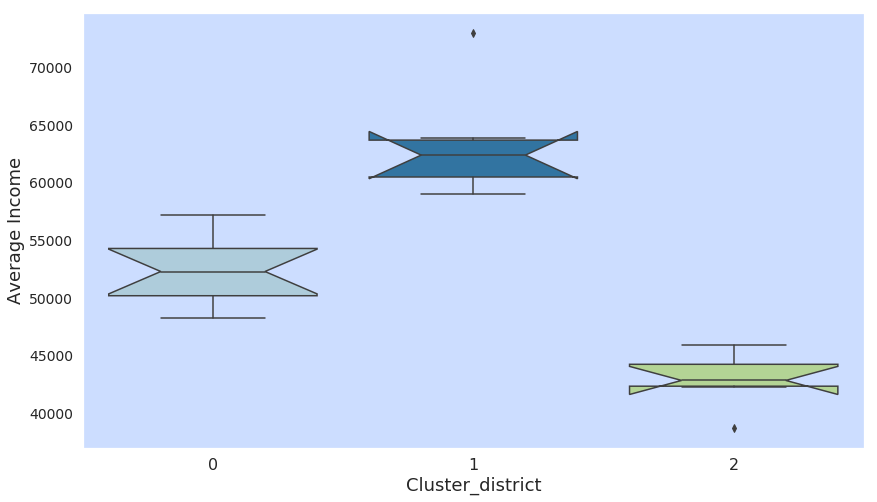

In [148]:
# import matplotlib as mpl
# import matplotlib.pyplot as plt

# districts_data.boxplot(by ='Cluster_district', column =['Average Income'], grid = False) 


import seaborn as sns

# plt.figure(figsize=(14,6))
# ax = sns.boxplot(y='Average Income', x='Cluster_district', 
#                  data=districts_data, 
#                  width=0.5,
#                  palette = 'Paired')
# plt.xlabel('Clusters')
# plt.ylabel('Average Income')

sns.set(rc={"axes.facecolor":"#ccddff",
            "axes.grid":False,
            'axes.labelsize':18,
            'figure.figsize':(14.0, 8.0),
            'xtick.labelsize':16,
            'ytick.labelsize':14})


p = sns.boxplot(data=districts_data,
                x = 'Cluster_district',
                y = 'Average Income',
                palette = 'Paired',
                notch=True)